C:\Users\Jonas Pielmeier\AppData\Local\Temp\ipykernel_32576\2293746263.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


                          Zero Mean - GARCH Model Results                           
Dep. Variable:                          SPY   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -1815.04
Distribution:      Standardized Student's t   AIC:                           3638.08
Method:                  Maximum Likelihood   BIC:                           3658.63
                                              No. Observations:                 1257
Date:                      Sun, Oct 26 2025   Df Residuals:                     1257
Time:                              21:19:30   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omeg

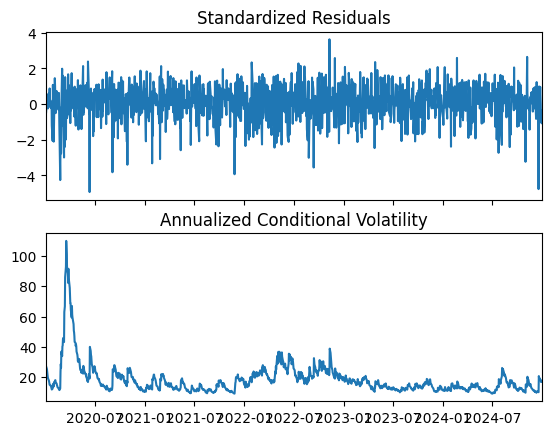

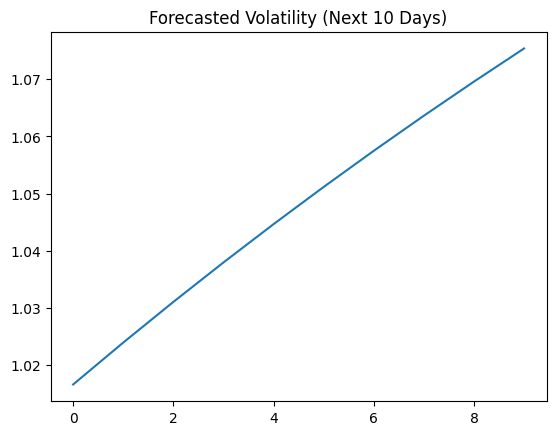

In [2]:
# 📘 02_garch_models.ipynb
# Goal: Estimate and forecast volatility with ARCH/GARCH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

# --- 1. Get data ---
ticker = "SPY"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
returns = 100 * np.log(data["Close"] / data["Close"].shift(1)).dropna()

# --- 2. Fit GARCH(1,1) ---
model = arch_model(returns, mean='Zero', vol='Garch', p=1, q=1, dist='t')
res = model.fit(disp='off')
print(res.summary())

# --- 3. Plot conditional volatility ---
res.plot(annualize="D")
plt.show()

# --- 4. Forecast next 10 days ---
forecasts = res.forecast(horizon=10)
vol_forecast = np.sqrt(forecasts.variance.values[-1,:])
plt.plot(vol_forecast)
plt.title("Forecasted Volatility (Next 10 Days)")
plt.show()
